	Data Types:

    Nominal: BMI_RANGE, SUFFICIENT_INCOME, GENDER, AGE
	Interval: All other variables

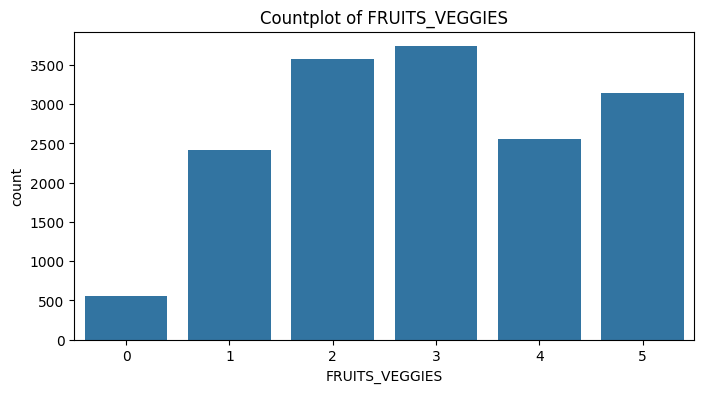

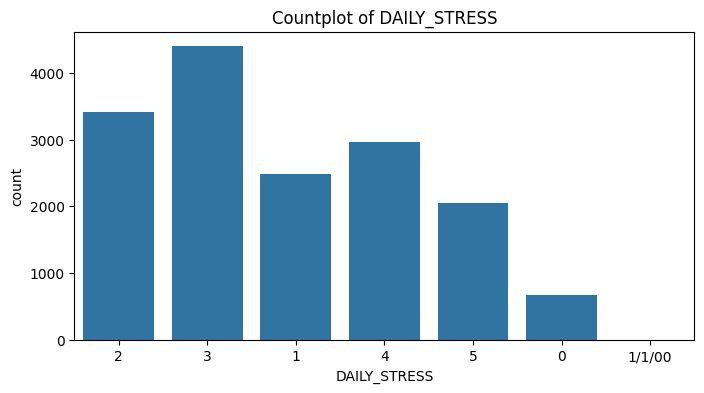

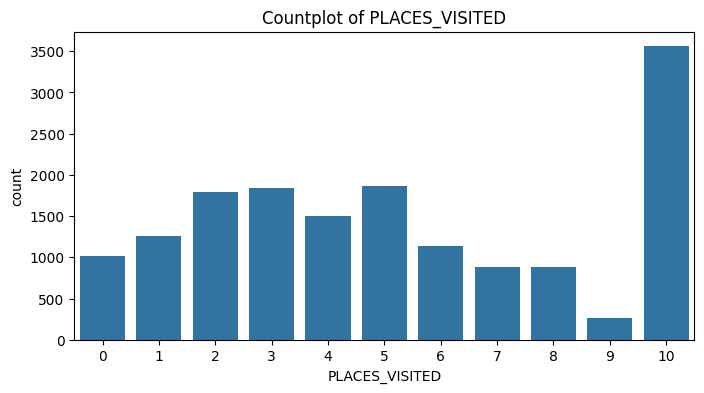

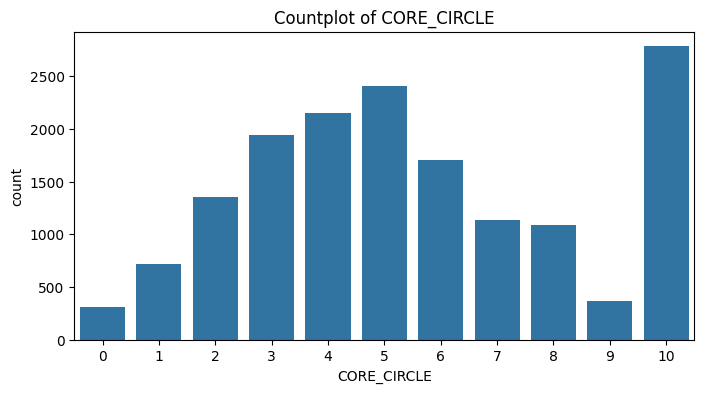

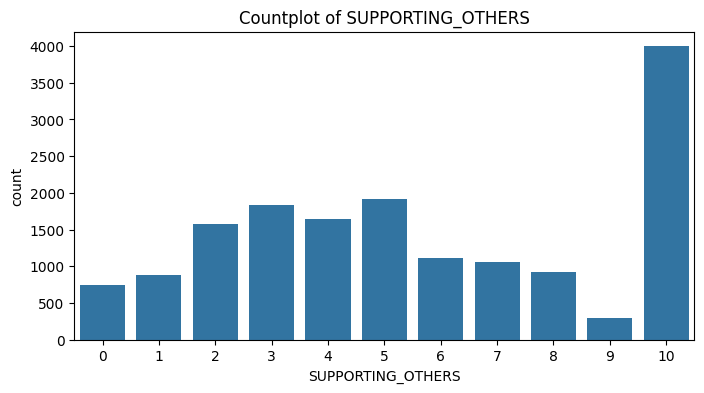

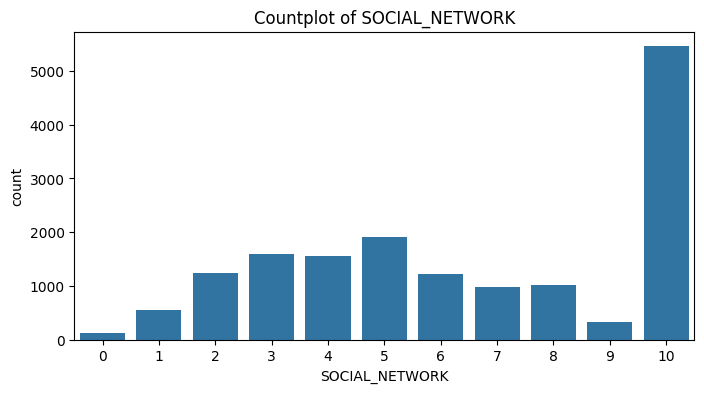

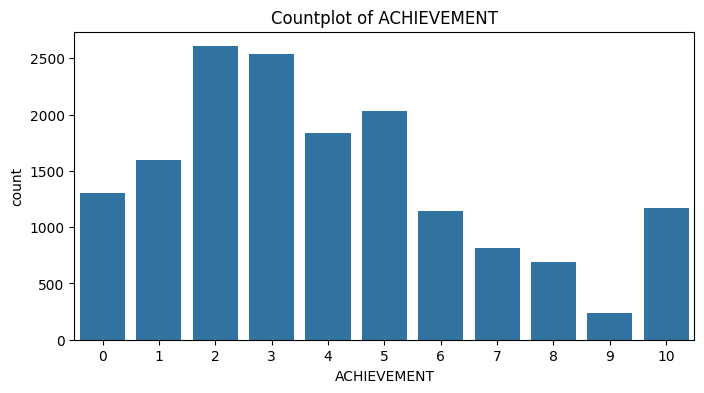

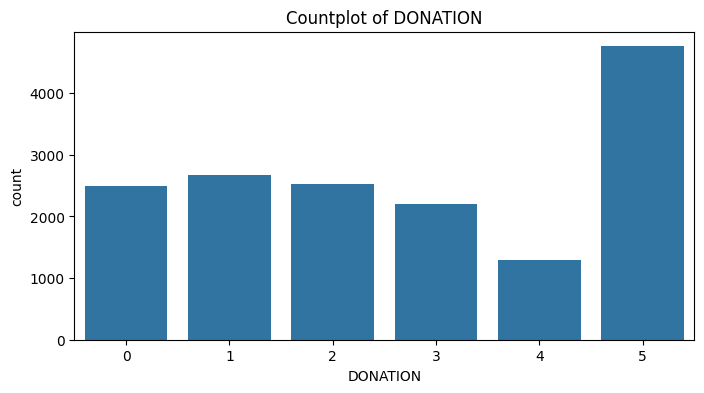

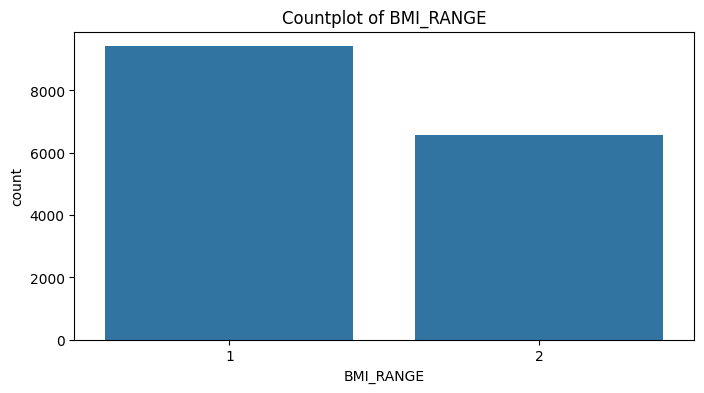

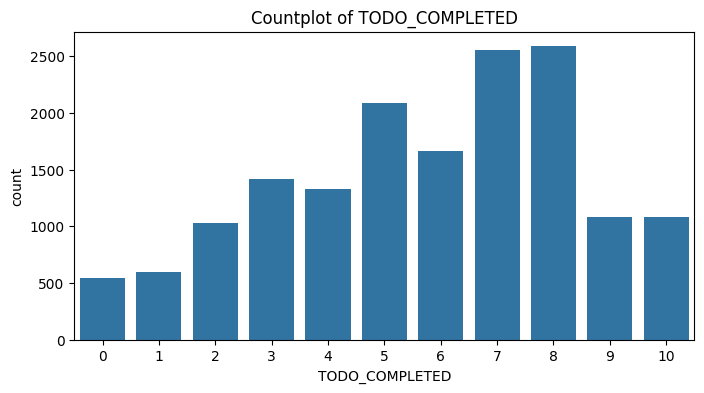

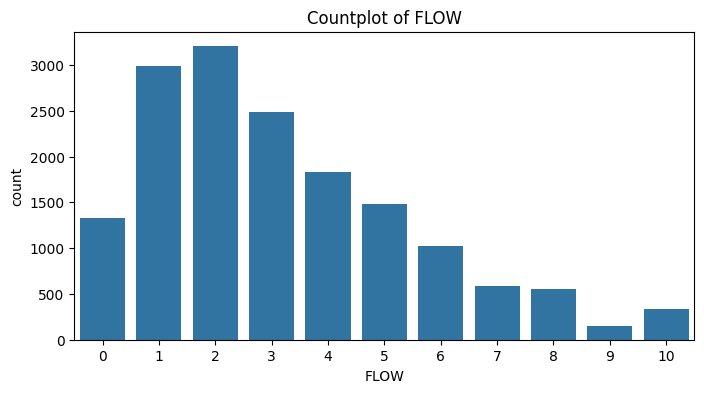

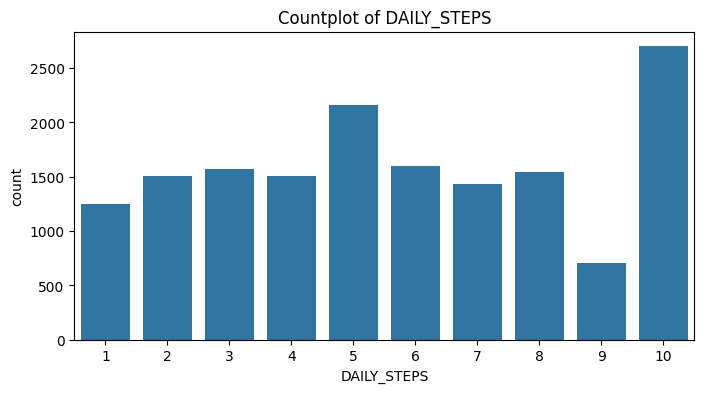

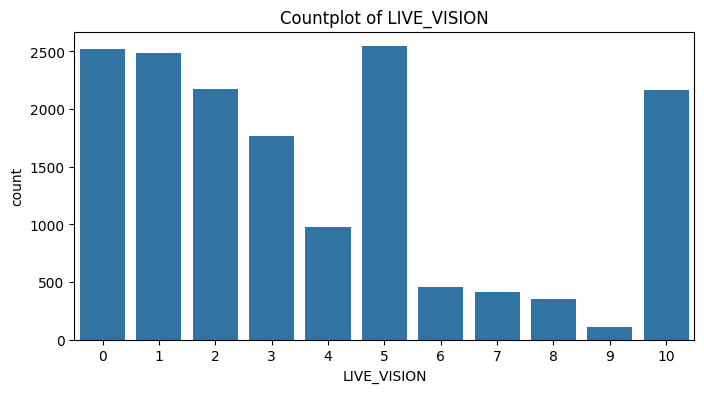

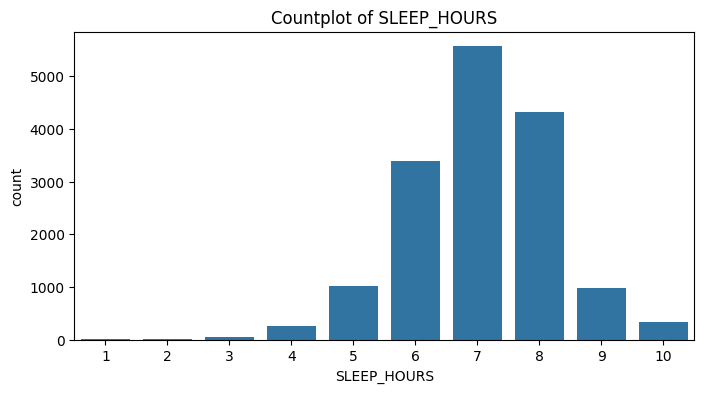

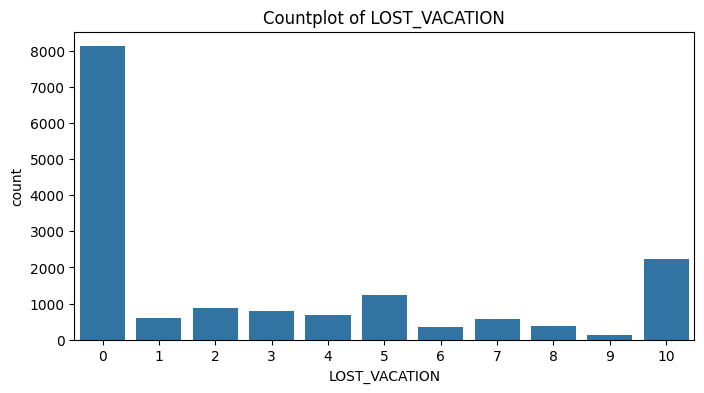

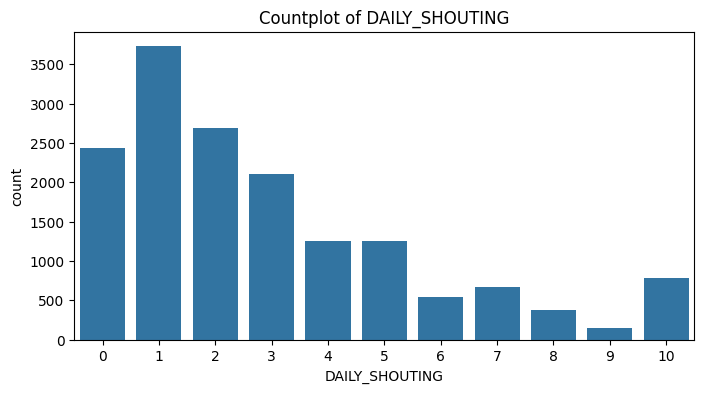

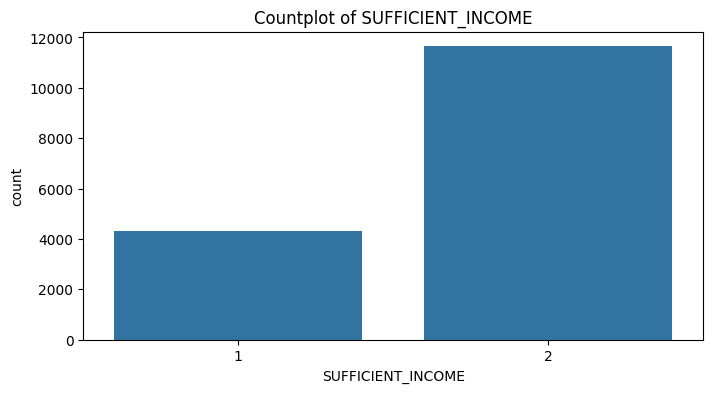

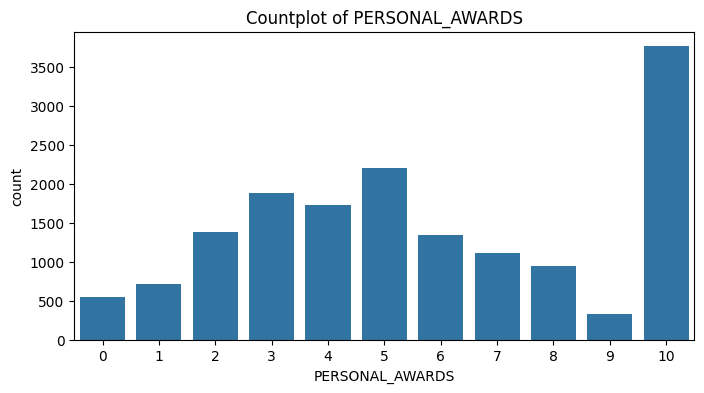

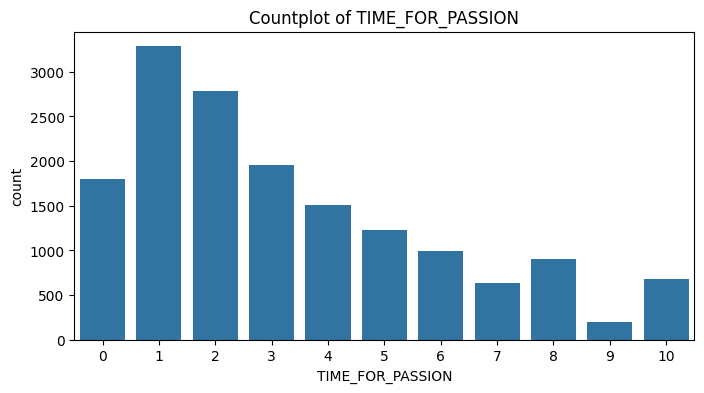

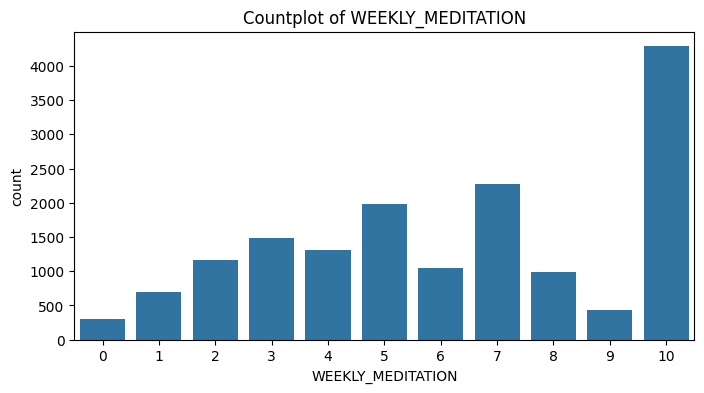

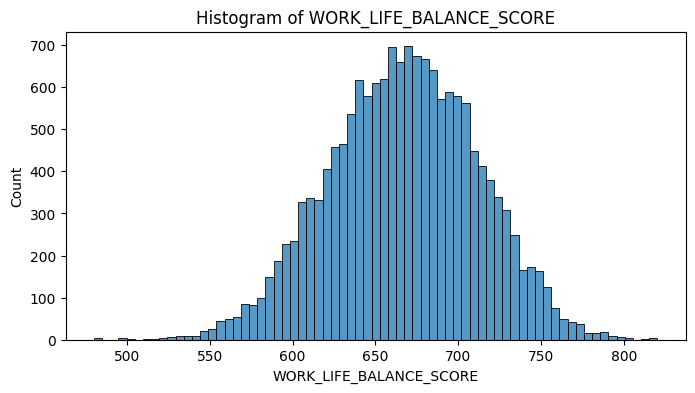

Outliers detection using box plots for each variable:



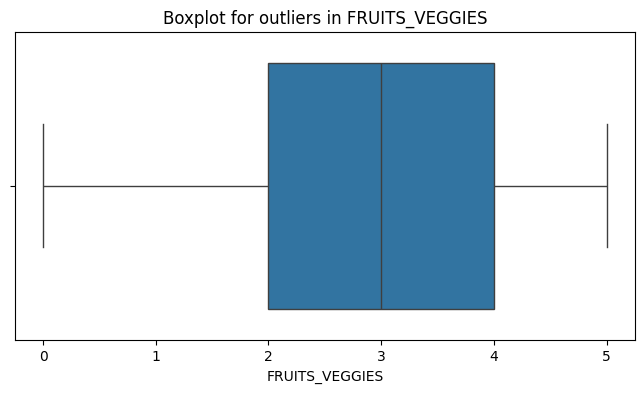

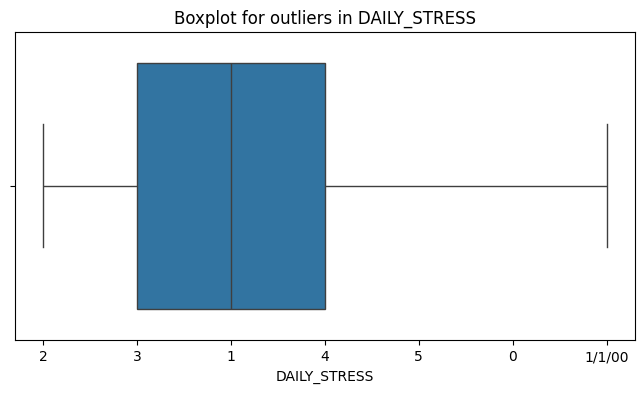

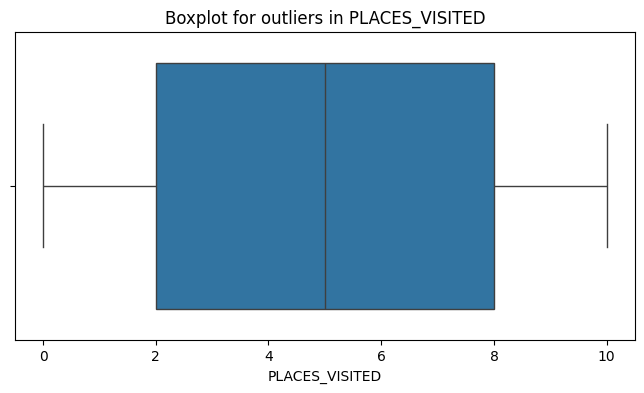

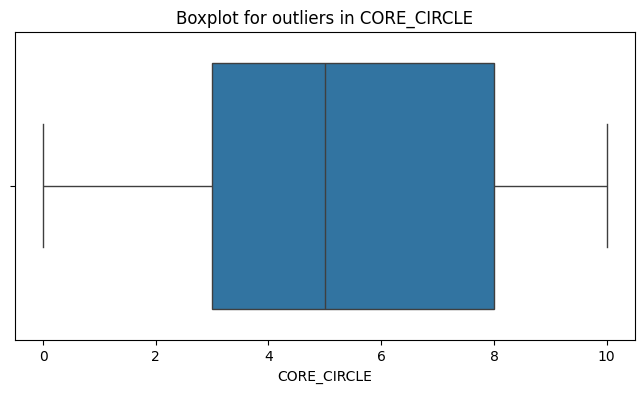

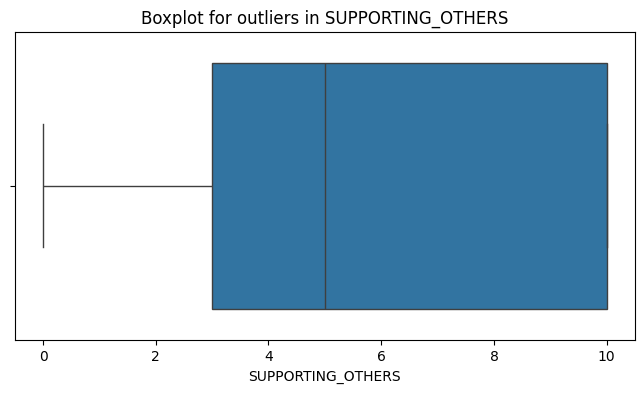

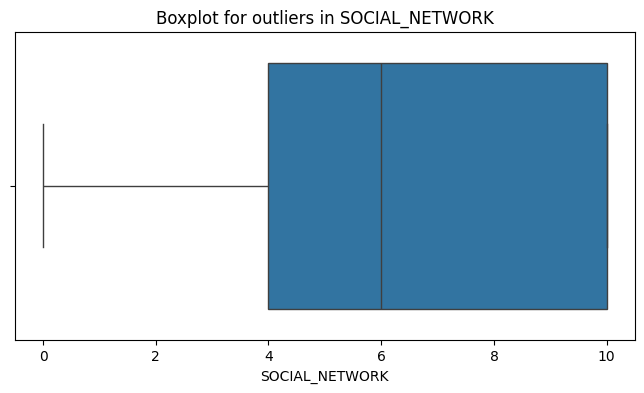

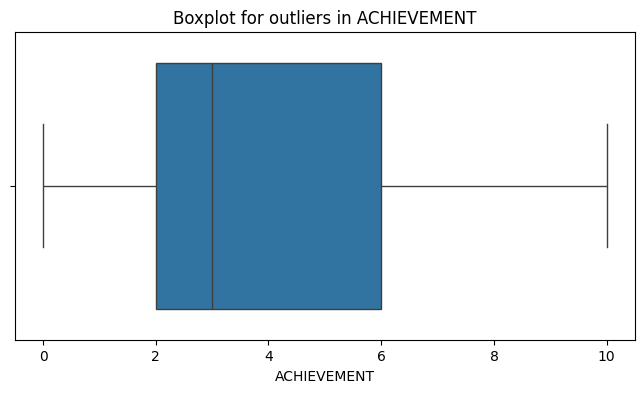

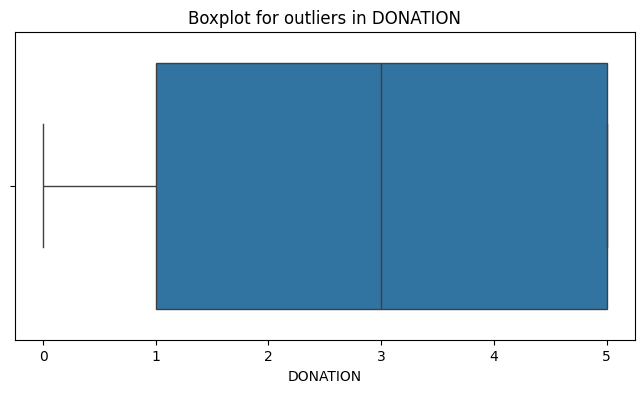

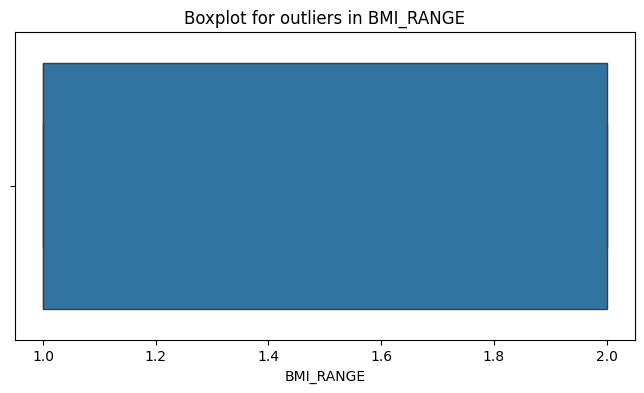

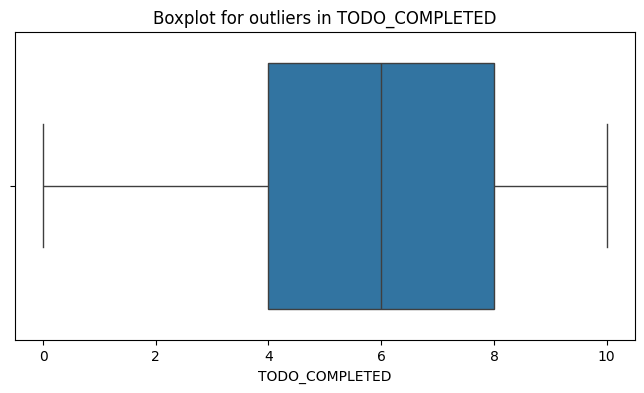

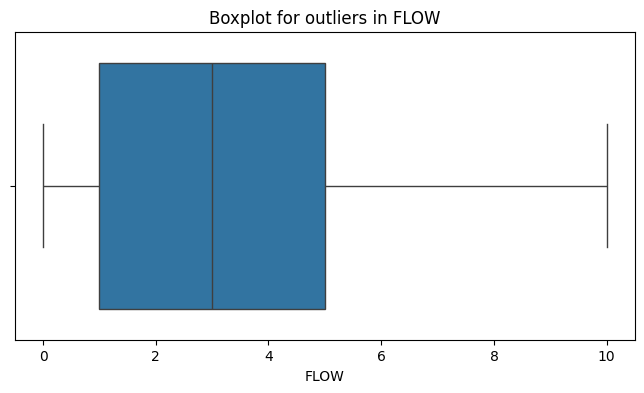

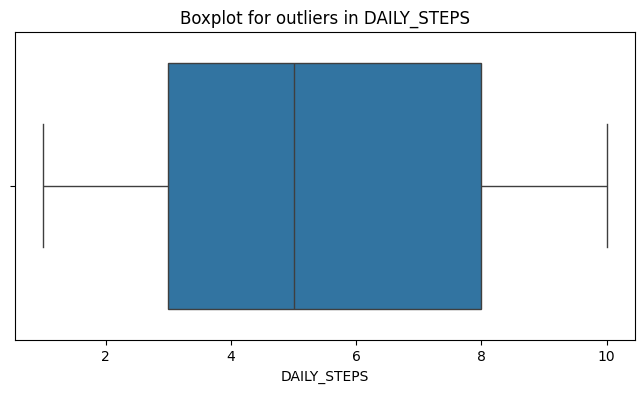

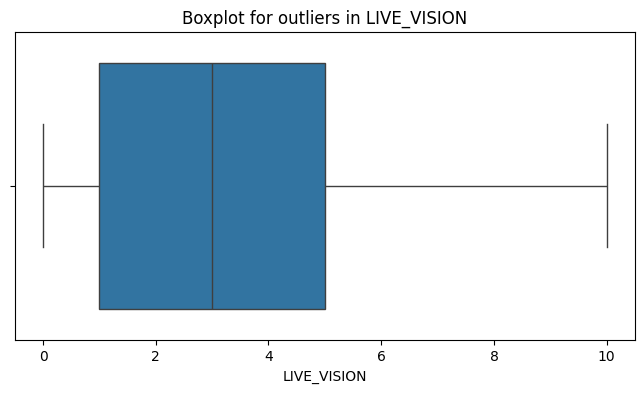

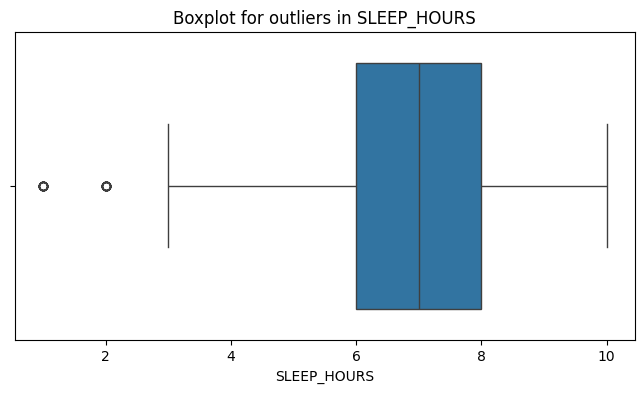

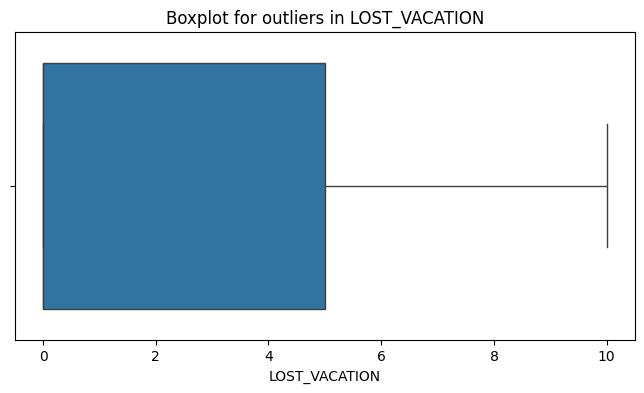

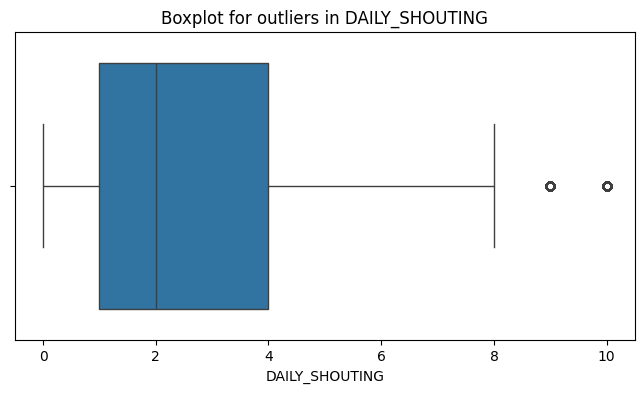

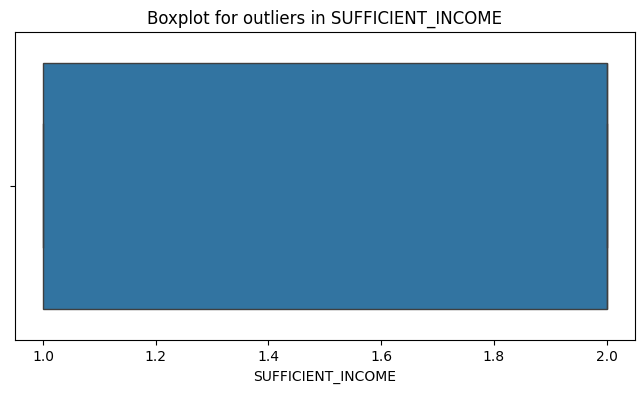

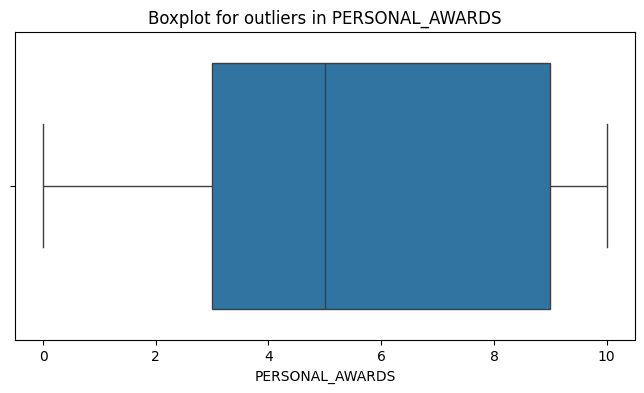

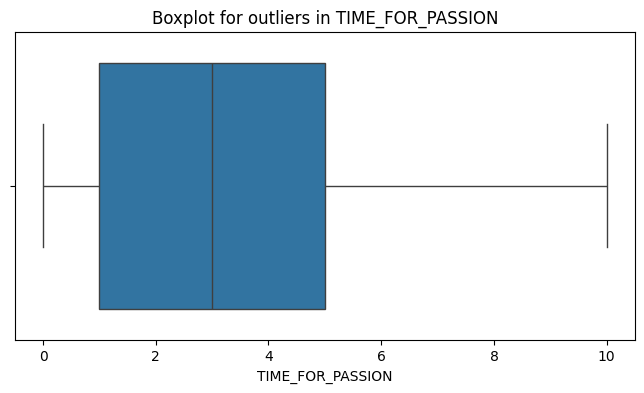

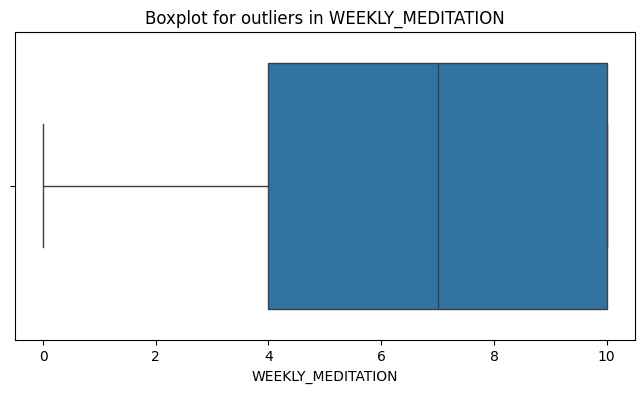

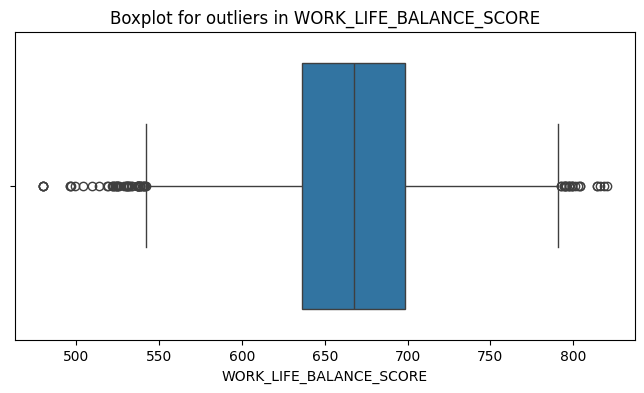

Correlation Matrix:

Selected numeric columns for correlation:
Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')
                         FRUITS_VEGGIES  PLACES_VISITED  CORE_CIRCLE  \
FRUITS_VEGGIES                 1.000000        0.254889     0.157774   
PLACES_VISITED                 0.254889        1.000000     0.255877   
CORE_CIRCLE                    0.157774        0.255877     1.000000   
SUPPORTING_OTHERS              0.204461        0.237847     0.337718   
SOCIAL_NETWORK                 0.106941        0.149253     0.308657   
ACHIEVEMENT                    0.162902        0.257917     0.289417   
DONATION                

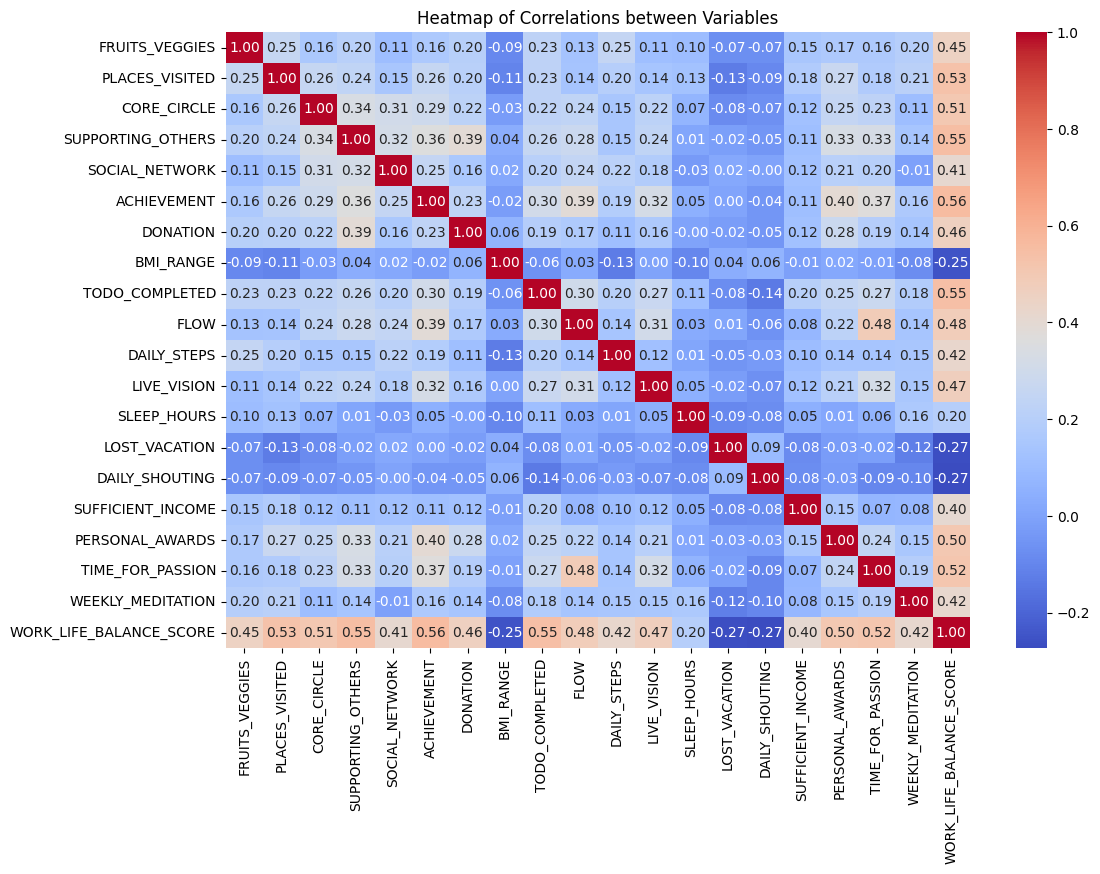

Skewness of the variables:

FRUITS_VEGGIES            -0.050982
PLACES_VISITED             0.170494
CORE_CIRCLE                0.202431
SUPPORTING_OTHERS          0.055665
SOCIAL_NETWORK            -0.175185
ACHIEVEMENT                0.628884
DONATION                  -0.047913
BMI_RANGE                  0.363255
TODO_COMPLETED            -0.356081
FLOW                       0.870127
DAILY_STEPS                0.039300
LIVE_VISION                0.740936
SLEEP_HOURS               -0.355797
LOST_VACATION              0.920513
DAILY_SHOUTING             1.118024
SUFFICIENT_INCOME         -1.030314
PERSONAL_AWARDS            0.061245
TIME_FOR_PASSION           0.841172
WEEKLY_MEDITATION         -0.192517
WORK_LIFE_BALANCE_SCORE   -0.104671
dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from the provided path
file_path = '/Users/hassanali/Desktop/USD/AAI-550/Datasets/Original Dataset/Wellbeing_and_lifestyle_data_Kaggle.csv'
df = pd.read_csv(file_path)

# Variables for analysis (including all from the dataset)
variables = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 
             'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 
             'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 
             'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 
             'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']

# Function to check if variable is discrete or continuous
def is_discrete(series):
    unique_values = series.nunique()
    return unique_values < 15  # Arbitrary threshold to decide if it's discrete




# 1.2 Visualize the data: Create appropriate plots based on variable type (discrete or continuous)

for var in variables:
    plt.figure(figsize=(8, 4))
    if is_discrete(df[var]):
        sns.countplot(x=df[var])  # Discrete data: use count plot
        plt.title(f'Countplot of {var}')
    else:
        sns.histplot(df[var], kde=False)  # Continuous data: use histogram
        plt.title(f'Histogram of {var}')
    plt.show()

# 1.3 Detect outliers: Identify any extreme values using box plots
print("Outliers detection using box plots for each variable:\n")
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot for outliers in {var}')
    plt.show()

# 2. Discover Patterns in Data

# 2.1 Find correlations between variables (select only numeric columns)
print("Correlation Matrix:\n")
numeric_df = df[variables].select_dtypes(include=[np.number])  # Select only numeric columns
print("Selected numeric columns for correlation:")
print(numeric_df.columns)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Heatmap of Correlations between Variables")
plt.show()

# 2.2 Analyze trends over time (if applicable)
# Assuming you have a timestamp or a time variable, you could use this section to visualize trends over time.

# 2.3 Check for normality of the variables' distribution using histograms and calculate skewness
print("Skewness of the variables:\n")
skewness_values = numeric_df.skew()
print(skewness_values)

Based on the analysis, here are the key variables you might want to consider for predicting the “Work-Life Balance Score,” along with reasoning derived from their statistical properties:

	1.	Achievement (Correlation: 0.561)
	•	Reason: Strongest positive correlation with “Work-Life Balance Score” (0.561), indicating a significant relationship. Higher achievement levels tend to be associated with higher work-life balance.
	•	Distribution: Skewed positively, with some concentration on higher values, suggesting that higher achievement could play a critical role in predicting work-life balance.
	2.	Supporting Others (Correlation: 0.548)
	•	Reason: Second highest positive correlation (0.548). Supporting others could reflect a well-rounded and socially fulfilled individual, which may contribute to a higher work-life balance score.
	•	Distribution: Fairly normal with moderate skewness, reinforcing that it’s well-distributed across participants.
	3.	Core Circle (Correlation: 0.507)
	•	Reason: Strong positive correlation (0.507) with the outcome variable. A strong core social circle is known to improve emotional and psychological well-being, which can directly impact work-life balance.
	•	Distribution: Fairly balanced distribution, making it a robust predictor.
	4.	Places Visited (Correlation: 0.530)
	•	Reason: Places visited has a strong correlation with work-life balance (0.530). It might indicate how travel and relaxation are important factors in maintaining a balance.
	•	Distribution: Skewed, indicating variability in travel experiences, which may be linked to better work-life balance.
	5.	Personal Awards (Correlation: 0.504)
	•	Reason: High positive correlation (0.504) suggests that recognition in personal or professional life might be a key driver in how individuals assess their work-life balance.
	•	Distribution: Positively skewed, showing that recognition might play an influential role for those who achieve it.
	6.	Time for Passion (Correlation: 0.517)
	•	Reason: Significant correlation with work-life balance (0.517), indicating that time spent on personal passions or hobbies is essential for maintaining work-life balance.
	•	Distribution: Skewed, indicating that while some people have time for their passions, many others may not, making it a critical differentiator.
	7.	Flow (Correlation: 0.478)
	•	Reason: Moderate correlation with work-life balance (0.478). The experience of “flow” may indicate productivity and engagement, which likely contributes to a better work-life balance.
	•	Distribution: Skewed, suggesting variability in how much individuals experience “flow.”
	8.	Sufficient Income (Correlation: 0.403)
	•	Reason: Income also plays a notable role in predicting work-life balance. A correlation of 0.403 shows that financial stability may alleviate stress and contribute to balance.
	•	Distribution: Slightly skewed but relatively balanced across the sample, indicating a role in determining work-life balance.
	9.	Daily Steps (Correlation: 0.423)
	•	Reason: Physical activity shows a positive correlation with work-life balance (0.423), indicating that those who are more physically active tend to experience a better balance.
	•	Distribution: Distributed across the population, making it a potentially reliable predictor.

Variables to Potentially Exclude:

	•	Lost Vacation (Correlation: -0.266)
	•	Reason: Negative correlation with work-life balance. Though relevant, it may not directly contribute to a better score and could detract from predicting positive balance outcomes.
	•	Daily Shouting (Correlation: -0.273)
	•	Reason: Negative correlation indicates that this behavior may reflect stress and a negative work-life balance, but its predictive power could be limited in improving work-life balance scores.

Based on the statistical insights, variables like Achievement, Supporting Others, Core Circle, Places Visited, and Time for Passion are the most significant predictors for the “Work-Life Balance Score.” You may want to focus your prediction models on these, while paying attention to the overall context in which other correlated variables might also contribute

In [6]:
print("Summary statistics for the variables:\n")
print(df[variables].describe())

Summary statistics for the variables:

       FRUITS_VEGGIES  PLACES_VISITED   CORE_CIRCLE  SUPPORTING_OTHERS  \
count    15972.000000    15972.000000  15972.000000       15972.000000   
mean         2.922677        5.232970      5.508077           5.616454   
std          1.442694        3.311912      2.840334           3.242021   
min          0.000000        0.000000      0.000000           0.000000   
25%          2.000000        2.000000      3.000000           3.000000   
50%          3.000000        5.000000      5.000000           5.000000   
75%          4.000000        8.000000      8.000000          10.000000   
max          5.000000       10.000000     10.000000          10.000000   

       SOCIAL_NETWORK   ACHIEVEMENT      DONATION     BMI_RANGE  \
count    15972.000000  15972.000000  15972.000000  15972.000000   
mean         6.474267      4.000751      2.715314      1.410656   
std          3.086672      2.755837      1.851586      0.491968   
min          0.000000     